# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).

Your organization has asked you to explore and answer some questions from the data collected. 

        1 - Determine if the proportion of adverse effects differs significantly between the Drug and Placebo groups, 
        saving the p-value as a variable called two_sample_p_value.
        2 - Find out if the number of adverse effects is independent of the treatment and control groups, 
        saving as a variable called num_effects_p_value containing a p-value.
        3 - Examine if there is a significant difference between the ages of the Drug and Placebo groups, 
        storing the p-value of your test in a variable called age_group_effects_p_value.

In [43]:
# Import packages
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

### 1 - Determine if the proportion of adverse effects differs significantly between the Drug and Placebo groups, saving the p-value as a variable called two_sample_p_value.

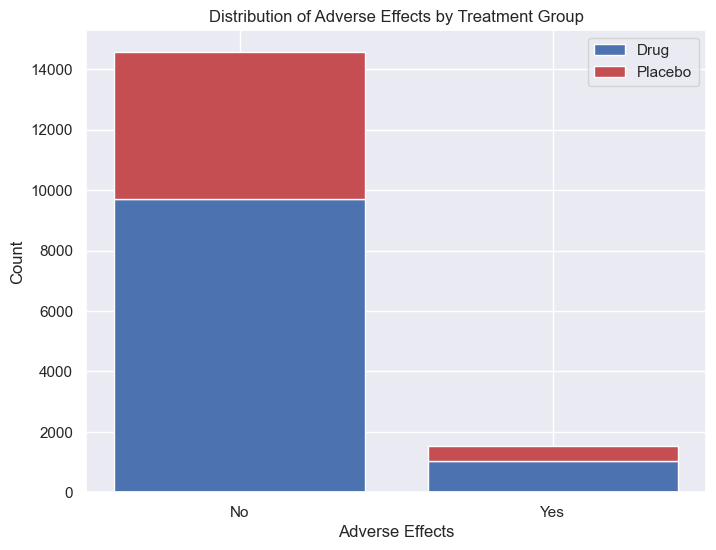

In [51]:
# 'adverse_effects' is a categorical variable with values 'Yes' and 'No'
# and 'trx' is the treatment group (Drug or Placebo)
drug_group = drug_safety[drug_safety['trx'] == 'Drug']['adverse_effects']
placebo_group = drug_safety[drug_safety['trx'] == 'Placebo']['adverse_effects']

# Count the occurrences of 'Yes' and 'No' for each group
drug_counts = drug_group.value_counts()
placebo_counts = placebo_group.value_counts()

sns.set()
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(drug_counts.index, drug_counts.values, color='b', label='Drug')
ax.bar(placebo_counts.index, placebo_counts.values, color='r', label='Placebo', bottom=drug_counts.values)
ax.set_title('Distribution of Adverse Effects by Treatment Group')
ax.set_xlabel('Adverse Effects')
ax.set_ylabel('Count')
ax.legend()
plt.show()

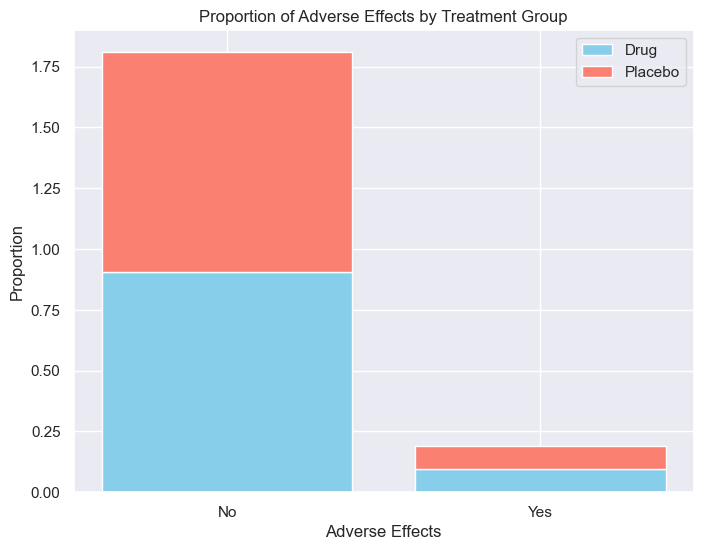

In [50]:
# Calculate proportions
drug_proportions = drug_counts / drug_counts.sum()
placebo_proportions = placebo_counts / placebo_counts.sum()

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(drug_proportions.index, drug_proportions.values, color='skyblue', label='Drug')
ax.bar(placebo_proportions.index, placebo_proportions.values, color='salmon', label='Placebo', bottom=drug_proportions.values)
ax.set_title('Proportion of Adverse Effects by Treatment Group')
ax.set_xlabel('Adverse Effects')
ax.set_ylabel('Proportion')
ax.legend()

plt.show()


Since the effects can occur in both directions and we have a large sample size (more than 30) we will use a two-tailed z-test to determine the p-value.

In [30]:
# Count the number of 'Yes' responses and total responses for each group

drug_y = drug_group.value_counts().get('Yes', 0)
drug_t = len(drug_group)

plac_y = placebo_group.value_counts().get('Yes', 0)
plac_t = len(placebo_group)

In [32]:
# Perform a two-sided z-test and store p-values as two_sample_p_value
stat, two_sample_p_value = proportions_ztest([drug_y, plac_y], [drug_t, plac_t])
two_sample_p_value

0.9639333330262475

### 2 - Find out if the number of adverse effects is independent of the treatment and control groups, saving as a variable called num_effects_p_value containing a p-value.

To determine if the variables 'num_effects' (Number of Adverse Effects) and 'trx' (Treatment Group: Drug or Placebo) are independent, We can use Chi-square test for independence. This test is appropriate when we have categorical data and want to assess whether there is a significant association between two categorical variables.

In [35]:
# Create a cross tabulation of 'num_effects' and 'trx' columns
ne_trx_cross = pd.crosstab(drug_safety['num_effects'], drug_safety['trx'])

# Perform a Chi-Square Test for independence
chi2, num_effects_p_value, a, b = chi2_contingency(ne_trx_cross) 
num_effects_p_value

0.6150123339426765

### 3 - Examine if there is a significant difference between the ages of the Drug and Placebo groups, storing the p-value of your test in a variable called age_group_effects_p_value.

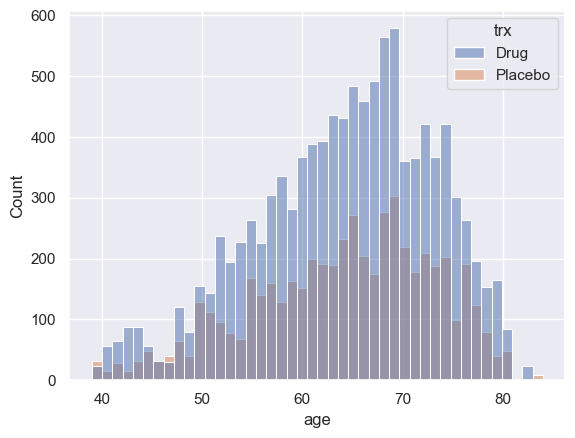

In [36]:
# Check normality by plotting a histogram

sns.histplot(data=drug_safety, x='age', hue='trx')
plt.show()

As we see in the histograms our data is not normally distributed, but if we are still not use about the normality we can use a Shapiro-Wilk test to check the normality of distribution. 

In [42]:
age_drug = drug_safety[drug_safety['trx'] == 'Drug']['age']
age_placebo = drug_safety[drug_safety['trx'] == 'Placebo']['age']

# Shapiro-Wilk test
stat_drug, p_value_drug = shapiro(age_drug)
stat_placebo, p_value_placebo = shapiro(age_placebo)

# Check if the data may be approximately normally distributed
alpha = 0.05
if p_value_drug > alpha:
    print('Drug Group. Data may be approximately normally distributed.')
else:
    print('Drug Group. Data may not be approximately normally distributed.')

if p_value_placebo > alpha:
    print('Placebo Group. Data may be approximately normally distributed.')
else:
    print('Placebo Group. Data may not be approximately normally distributed.')

Drug Group. Data may not be approximately normally distributed.
Placebo Group. Data may not be approximately normally distributed.


Since the non normality of our data is confirmed we are going to use a non-parametric tests: two-sided Mann-Whitney U test

In [44]:
# Perform the Mann-Whitney U test
u_statistic, age_group_effects_p_value = mannwhitneyu(age_drug, age_placebo)
age_group_effects_p_value

0.25696267004066287